## 4.3 嵌入法

**基础知识**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

path = "/Users/qiwsir/Documents/Codes/DataSet"
df_wine = pd.read_csv(path + "/winemag/wine_data.csv")
X, y = df_wine.iloc[:, 1:], df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

lr = LogisticRegression(C=1.0, penalty='l1')    # ①
model = SelectFromModel(lr, threshold='median')    # ②
X_new = model.fit_transform(X_train_std, y_train)
X_new.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_p

(124, 7)

In [2]:
X_train_std.shape

(124, 13)

**项目案例**

In [3]:
data = pd.read_csv(path + "/kaggle/diabetes.csv")
data.shape

(768, 9)

In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
X = data.loc[:, :"Age"]
y = data.loc[:, "Outcome":]

from xgboost import XGBClassifier
model = XGBClassifier()    # ③
model.fit(X,y)
model.feature_importances_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.089701  , 0.17109634, 0.08139535, 0.04651163, 0.10465116,
       0.2026578 , 0.1627907 , 0.14119601], dtype=float32)

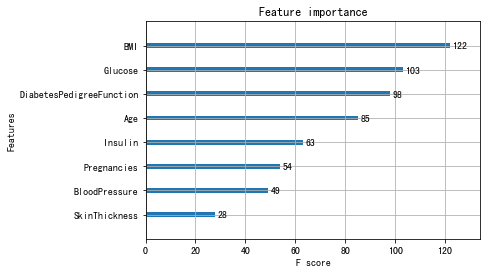

In [6]:
%matplotlib inline
from xgboost import plot_importance
plot_importance(model)

In [7]:
selection = SelectFromModel(model, threshold='median', prefit=True)    
X_new = selection.transform(X)
X_new.shape, X.shape

((768, 4), (768, 8))

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = XGBClassifier()
model.fit(X_train, y_train.values.reshape(1, -1)[0])
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.2f}%".format(accuracy * 100))

thresholds = np.sort(model.feature_importances_)
for threshold in thresholds:
    selection = SelectFromModel(model, threshold=threshold, prefit=True)
    X_train_new = selection.transform(X_train)
    X_test_new = selection.transform(X_test)
    
    selection_model = XGBClassifier()
    selection_model.fit(X_train_new, y_train.values.reshape(1, -1)[0])
    y_pred = selection_model.predict(X_test_new)
    accuracy = accuracy_score(y_test, y_pred)
    print("Thresh={0:.2f}, n={1}, Accuracy: {2:.2f}%".format(threshold, X_train_new.shape[1], accuracy*100))

Accuracy: 77.49%
Thresh=0.05, n=8, Accuracy: 77.49%
Thresh=0.06, n=7, Accuracy: 78.35%
Thresh=0.07, n=6, Accuracy: 77.92%
Thresh=0.08, n=5, Accuracy: 77.92%
Thresh=0.15, n=4, Accuracy: 79.22%
Thresh=0.19, n=3, Accuracy: 69.26%
Thresh=0.20, n=2, Accuracy: 70.13%
Thresh=0.20, n=1, Accuracy: 69.26%


**动手练习**

In [19]:
df = pd.read_csv(path + "/kaggle/application_small.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.shape

(30751, 122)

In [20]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [21]:
# 数字类型的特征和非数字类型的特征分别保存到不同的列表中
categorical_list = []
numerical_list = []
for i in df.columns.tolist():
    if df[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 16
Number of numerical features: 106


In [22]:
# 检查numerical_list中的特征是否有缺失值
df[numerical_list].isna().any()

SK_ID_CURR                     False
TARGET                         False
CNT_CHILDREN                   False
AMT_INCOME_TOTAL               False
AMT_CREDIT                     False
AMT_ANNUITY                     True
AMT_GOODS_PRICE                 True
REGION_POPULATION_RELATIVE     False
DAYS_BIRTH                     False
DAYS_EMPLOYED                  False
DAYS_REGISTRATION              False
DAYS_ID_PUBLISH                False
OWN_CAR_AGE                     True
FLAG_MOBIL                     False
FLAG_EMP_PHONE                 False
FLAG_WORK_PHONE                False
FLAG_CONT_MOBILE               False
FLAG_PHONE                     False
FLAG_EMAIL                     False
CNT_FAM_MEMBERS                False
REGION_RATING_CLIENT           False
REGION_RATING_CLIENT_W_CITY    False
HOUR_APPR_PROCESS_START        False
REG_REGION_NOT_LIVE_REGION     False
REG_REGION_NOT_WORK_REGION     False
LIVE_REGION_NOT_WORK_REGION    False
REG_CITY_NOT_LIVE_CITY         False
R

In [23]:
# 用每个特征的中位数填补本特征中的缺失数据
from sklearn.preprocessing import Imputer
df[numerical_list] = Imputer(strategy='median').fit_transform(df[numerical_list])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [24]:
# categorical_list中的特征都是分类型特征，于是乎进行OneHot编码（创建虚拟变量）
df = pd.get_dummies(df, drop_first=True)
df.shape

(30751, 228)

In [25]:
X = df.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = df['TARGET']
feature_name = X.columns.tolist()

In [26]:
# 先对X进行特征规范化操作，而后利用卡方检验选择100个特征

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(X)    # MinMax区间化
chi_selector = SelectKBest(chi2, k=100)    # 过滤器法
chi_selector.fit(X_norm, y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


SelectKBest(k=100, score_func=<function chi2 at 0x11b8d8950>)

In [27]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()   

In [28]:
# 使用封装器，选100个特征
from sklearn.feature_selection import RFE    
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=100, step=10, verbose=5)   
rfe_selector.fit(X_norm, y)    
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()

Fitting estimator with 226 features.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 216 features.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 206 features.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 196 features.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 186 features.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 176 features.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 166 features.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 156 features.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 146 features.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 136 features.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 126 features.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 116 features.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 106 features.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
# 用嵌入法选择特征
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression    #使用logistic回归模型

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), '1.25*median')
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


102 selected features


In [30]:
# 不用对数几率回归模型，改为随机森林分类
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier    #相对上面，模型换了

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

99 selected features


In [31]:
# 下把特征按照被选择的次数从高到低列出来
feature_selection_df = pd.DataFrame({'Feature':feature_name, 
                                     'Chi-2':chi_support, 
                                     'RFE':rfe_support, 
                                     'Logistics':embeded_lr_support,
                                     'Random Forest':embeded_rf_support})
# 每个特征在不同方式中被选择的次数总和
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# 按照次数大小，显示前100个
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(100)

,Feature,Chi-2,RFE,Logistics,Random Forest,Total
1,REGION_RATING_CLIENT_W_CITY,True,True,True,True,4
2,ORGANIZATION_TYPE_Self-employed,True,True,True,True,4
3,ORGANIZATION_TYPE_Business Entity Type 3,True,True,True,True,4
4,NAME_EDUCATION_TYPE_Higher education,True,True,True,True,4
5,FLOORSMAX_MODE,True,True,True,True,4
6,FLAG_OWN_CAR_Y,True,True,True,True,4
7,FLAG_DOCUMENT_3,True,True,True,True,4
8,EXT_SOURCE_3,True,True,True,True,4
9,EXT_SOURCE_2,True,True,True,True,4
10,EXT_SOURCE_1,True,True,True,True,4
